# Лабораторная работа №5

# Сегментация изображений

## Никитина Наталья, гр. РИМ-181226

In [95]:
import numpy as np
from skimage import data
from skimage import segmentation as seg
from skimage import filters as filters
from skimage import draw as draw
from skimage import color as color
from skimage.io import imshow, imread
from skimage.feature import canny
from skimage.transform import resize
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.morphology import watershed
from skimage.color import label2rgb

## Сегментация при помощи scikit-learn

## Сегментация монет

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


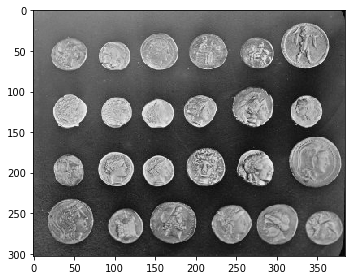

In [96]:
coins = data.coins()
imshow(coins)

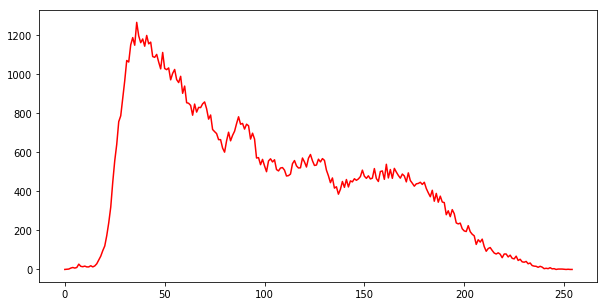

In [97]:
coins_hist = np.histogram(coins, bins=np.arange(0, 256))

plt.figure(figsize=(10,5))
plt.plot(coins_hist[1][:-1], coins_hist[0], 'r')

### Сегментация на основе краев

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


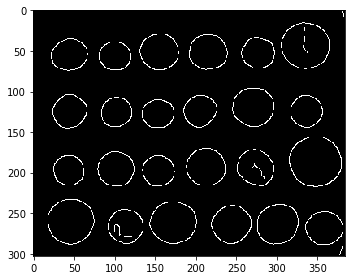

In [98]:
edges = canny(coins/255., sigma=3)
imshow(edges)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


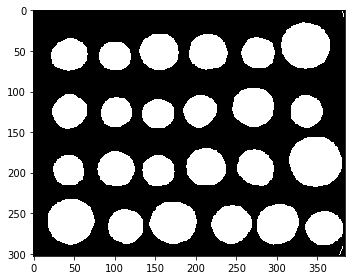

In [99]:
fill_coins = ndi.binary_fill_holes(edges)
imshow(fill_coins)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


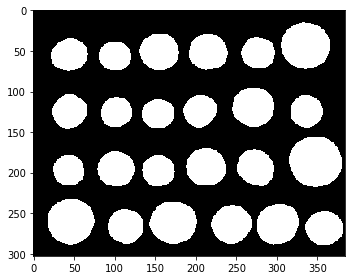

In [100]:
label_objects, nb_labels = ndi.label(fill_coins)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 15
mask_sizes[0] = 0
clean_coins = mask_sizes[label_objects]

imshow(clean_coins)

### Сегментация по регионам

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


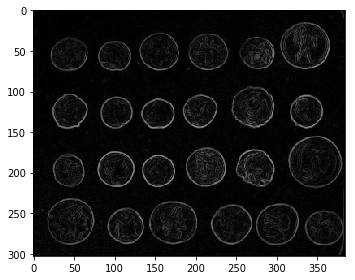

In [122]:
elevation_map = sobel(coins)
imshow(elevation_map)

In [123]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

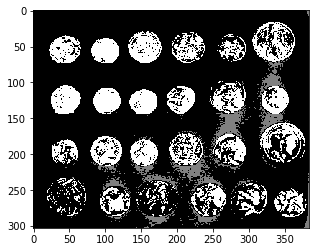

In [124]:
plt.imshow(markers, cmap=plt.cm.gray)

In [125]:
segmentation = watershed(elevation_map, markers)

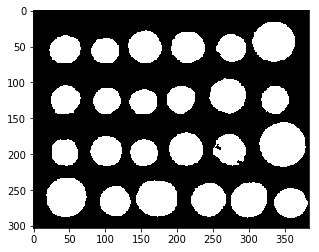

In [126]:
plt.imshow(segmentation, cmap=plt.cm.gray)

In [127]:
segmentation = ndi.binary_fill_holes(segmentation - 1)

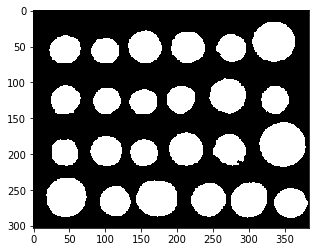

In [128]:
plt.imshow(segmentation, cmap=plt.cm.gray)

In [129]:
labeled_coins, _ = ndi.label(segmentation)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


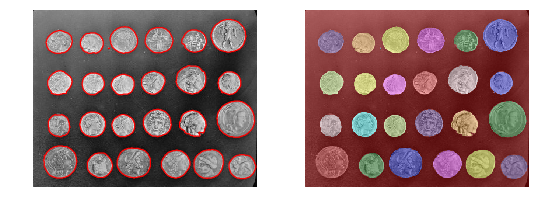

In [130]:
image_label_overlay = label2rgb(labeled_coins, image=coins)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(segmentation, [0.5], linewidths=1.2, colors='r')
axes[1].imshow(image_label_overlay, interpolation='nearest')

for a in axes:
    a.axis('off')
    a.set_adjustable('box-forced')

plt.tight_layout()

## Сегментация текста

In [13]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a653692630>)

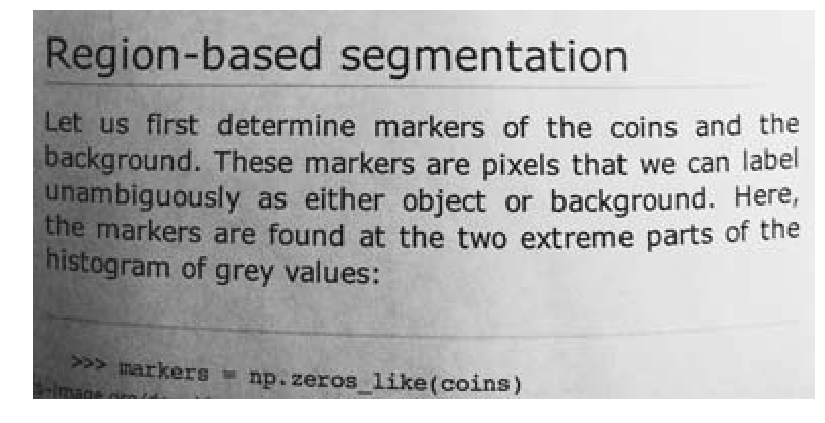

In [14]:
text = data.page()
image_show(text)

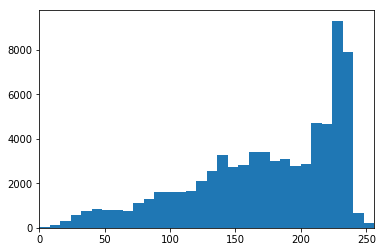

In [15]:
fig, ax = plt.subplots(1, 1)
ax.hist(text.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

### Контролируемый порог

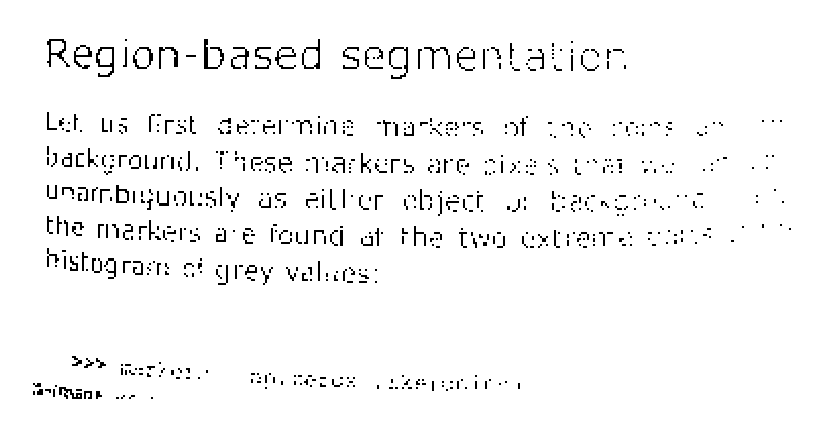

In [16]:
text_segmented_50 = text > 50
image_show(text_segmented_50);

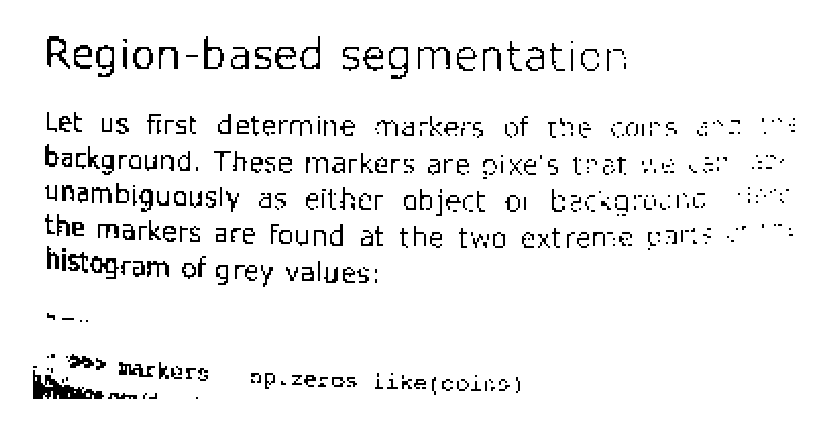

In [17]:
text_segmented_70 = text > 70
image_show(text_segmented_70);

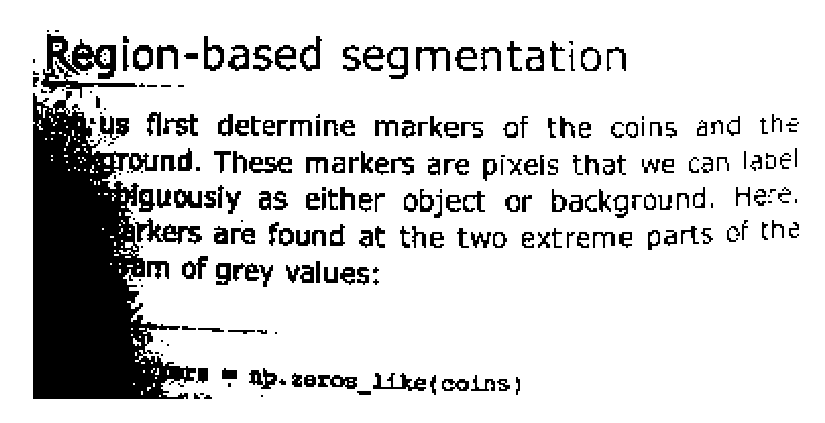

In [18]:
text_segmented_120 = text > 120
image_show(text_segmented_120);

### Неконтролируемый порог

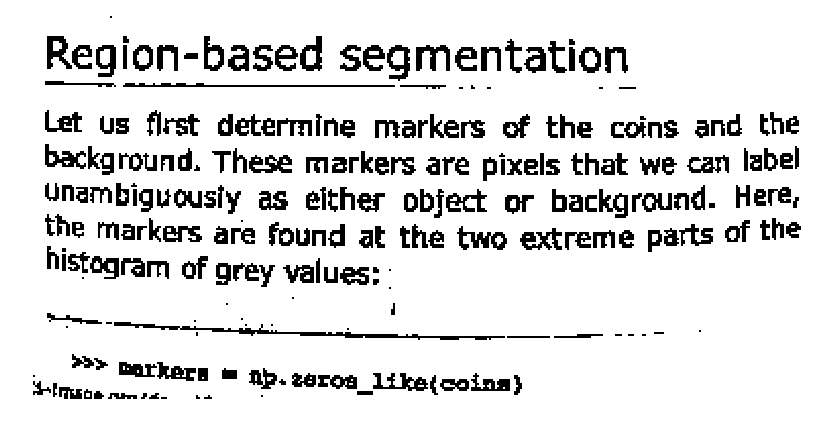

In [19]:
text_threshold = filters.threshold_local(text,block_size=51, offset=10) 
image_show(text > text_threshold);

## Сегментация лица

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


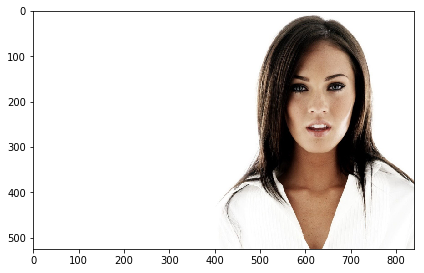

In [20]:
image = imread('girl.jpg') 
image = resize(image, (image.shape[0]//2,image.shape[1]//2))
imshow(image)

### Сегментация с алгоритмом для модели с учителем

### Активная контурная сегментация

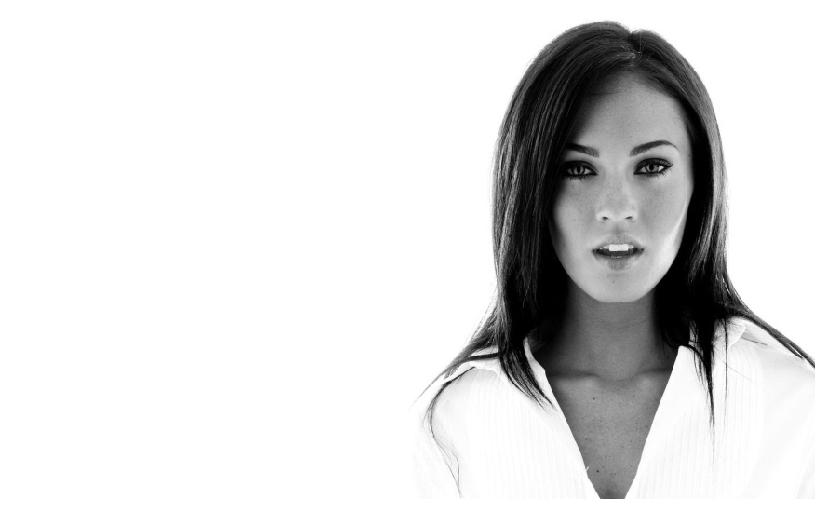

In [21]:
image_gray = color.rgb2gray(image) 
image_show(image_gray);

In [22]:
def circle_points(resolution, center, radius): 
    #Generate points which define a circle on an image. Centre refers to the centre of the circle
     
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
    #Exclude last point because a closed path should not have duplicate points

points = circle_points(290, [200, 625], 140)[:-1]

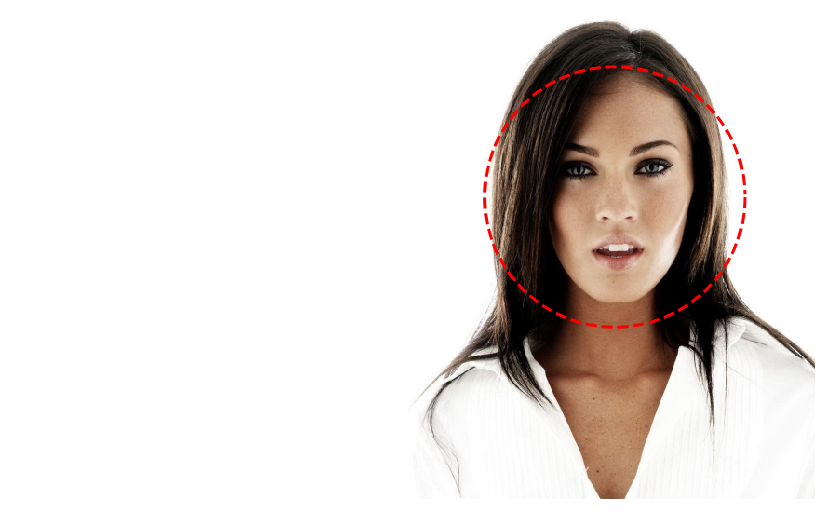

In [23]:
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

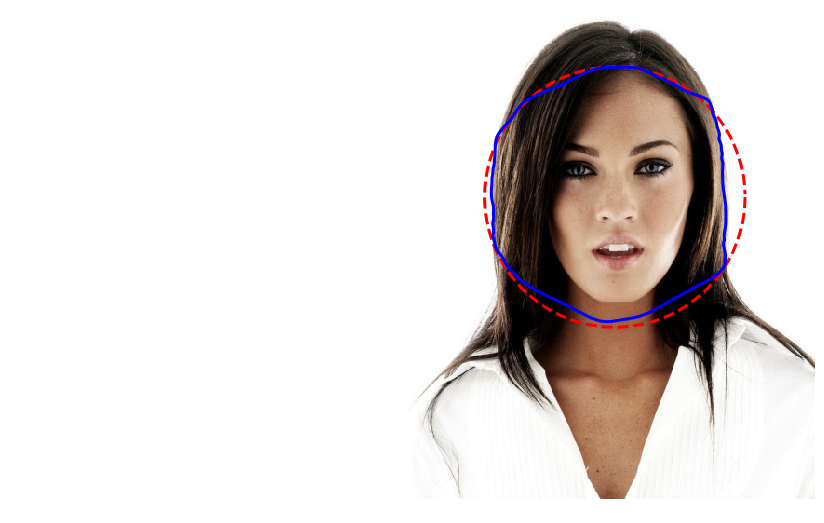

In [24]:
snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.3)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

### Сегментация случайного прохождения

In [78]:
image_labels = np.zeros(image_gray.shape, dtype=np.uint8)

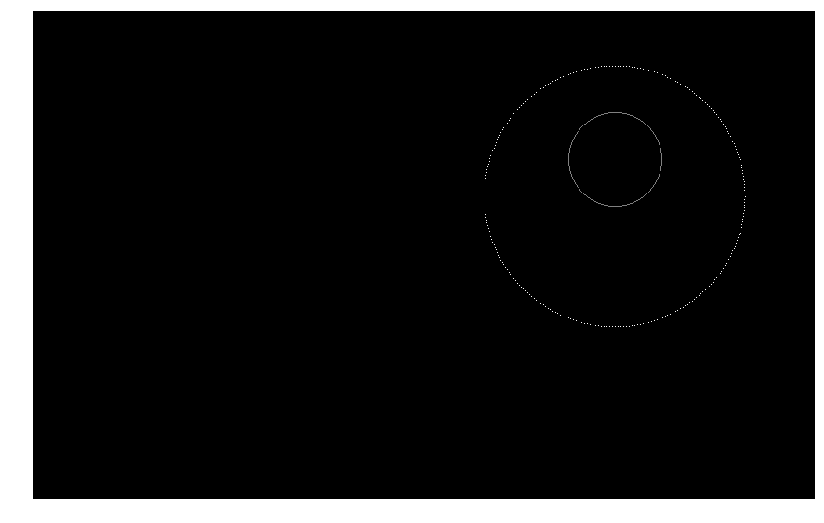

In [79]:
indices = draw.circle_perimeter(160, 625, 50)
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
image_show(image_labels);

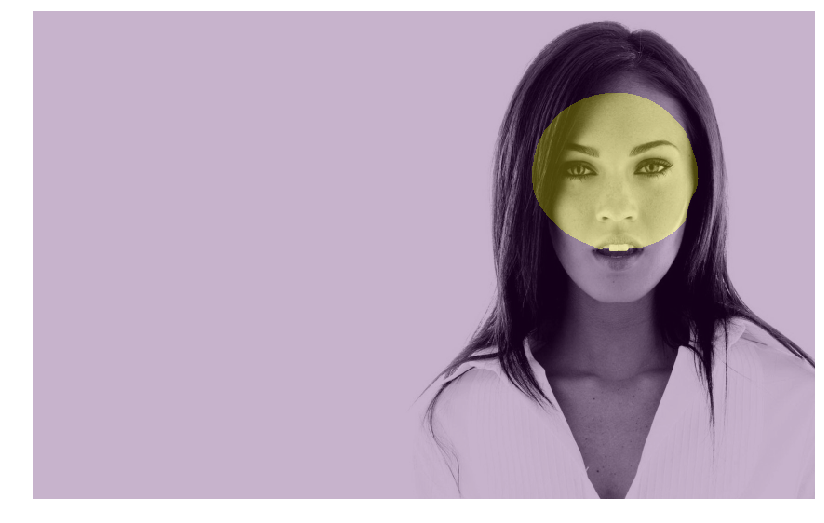

In [80]:
image_segmented = seg.random_walker(image_gray, image_labels)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);

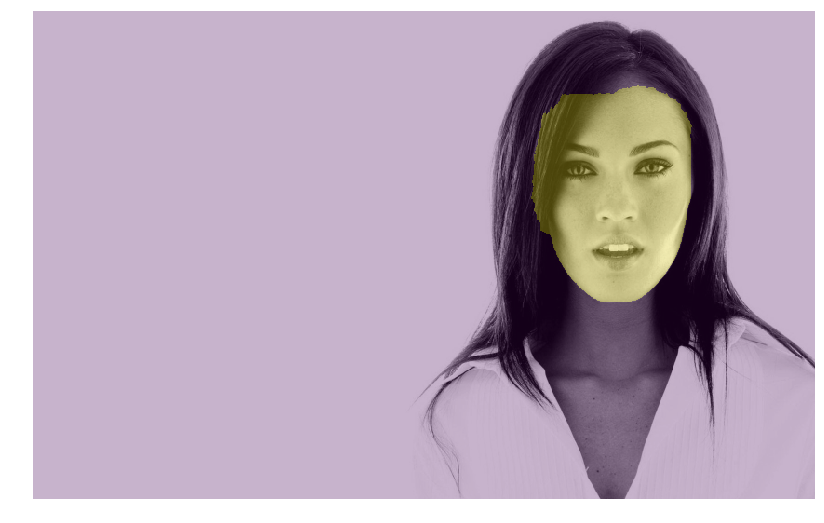

In [81]:
image_segmented = seg.random_walker(image_gray, image_labels, beta = 3000)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);

### Сегментация без учителя

### Простая Линейно-итеративная Кластеризация (SLIC)

In [82]:
image_slic = seg.slic(image,n_segments=155)

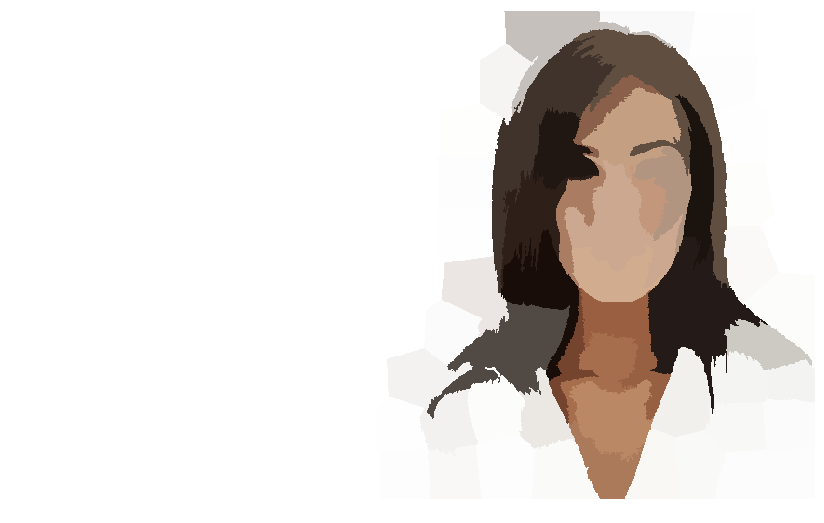

In [83]:
image_show(color.label2rgb(image_slic, image, kind='avg'));

### Felzenszwalb

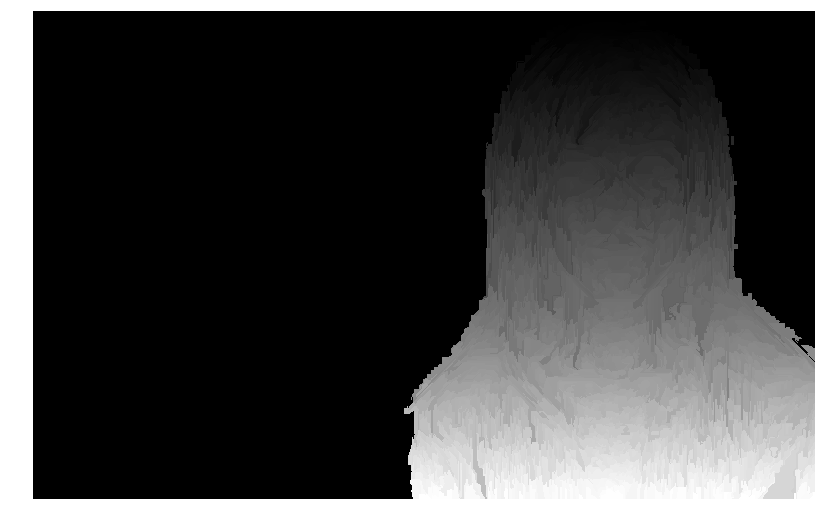

In [84]:
image_felzenszwalb = seg.felzenszwalb(image) 
image_show(image_felzenszwalb);

In [85]:
np.unique(image_felzenszwalb).size

2275

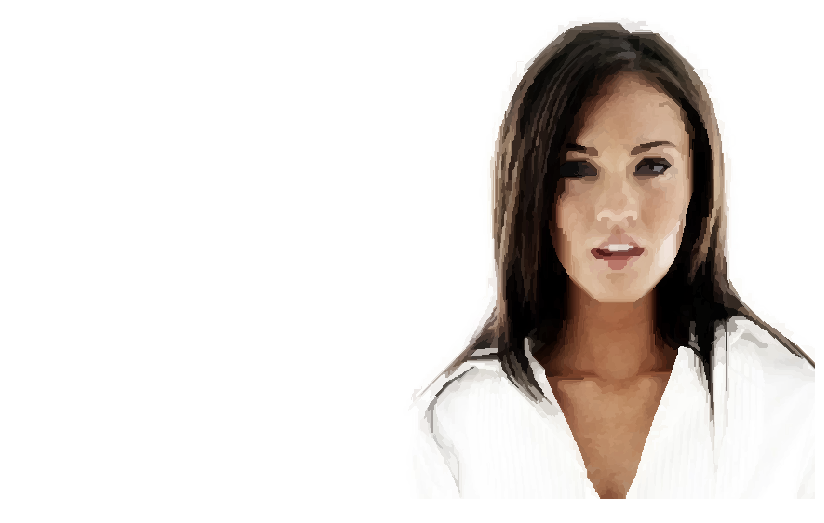

In [86]:
image_felzenszwalb_colored = color.label2rgb(image_felzenszwalb, image, kind='avg')
image_show(image_felzenszwalb_colored);